In [10]:
! pip install imblearn
! pip install xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns




[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\vicky\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: C:\Users\vicky\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 6.7 MB/s eta 0:00:23
    --------------------------------------- 2.1/150.0 MB 6.2 MB/s eta 0:00:24
    --------------------------------------- 3.4/150.0 MB 6.1 MB/s eta 0:00:24
   - -------------------------------------- 4.7/150.0 MB 6.1 MB/s eta 0:00:24
   - -------------------------------------- 6.0/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 7.3/150.0 MB 6.2 MB/s eta 0:00:23
   -- ------------------------------------- 8.7/150.0 MB 6.2 MB/s eta 0:00:23
   -- ------------------------------------- 10.0/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 11.3/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 12.6/150.0 MB 6.2 MB/s eta 0:00:23
   --- ------------------------------------ 14.2/150.0 MB 6.2 MB/s eta 0:00:22
   ---- ----------------------------------- 15.5/150.0 MB 6.2 MB/s 

In [ ]:
# Load dataset (Update with the correct path to your dataset)
data = pd.read_csv('creditcard.csv')  



In [3]:
# Step 1: Data Exploration
print("Dataset Info:")
print(data.info())
print("\nClass Distribution:")
print(data['Class'].value_counts(normalize=True))



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [ ]:
# Step 2: Preprocessing
scaler = StandardScaler()
data['Time'] = scaler.fit_transform(data[['Time']])
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Features and target
X = data.drop('Class', axis=1)
y = data['Class']



In [5]:
# Step 3: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [6]:
# Step 4: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("\nResampled Class Distribution:")
print(pd.Series(y_train_res).value_counts(normalize=True))




Resampled Class Distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Step 5: Train XGBoost Model
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=1,  
    n_jobs=-1
)
model.fit(X_train_res, y_train_res)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)


Confusion Matrix:
[[56703   161]
 [   13    85]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.87      0.49        98

    accuracy                           1.00     56962
   macro avg       0.67      0.93      0.75     56962
weighted avg       1.00      1.00      1.00     56962


Area Under Precision-Recall Curve (AUPRC): 0.8264444246769851


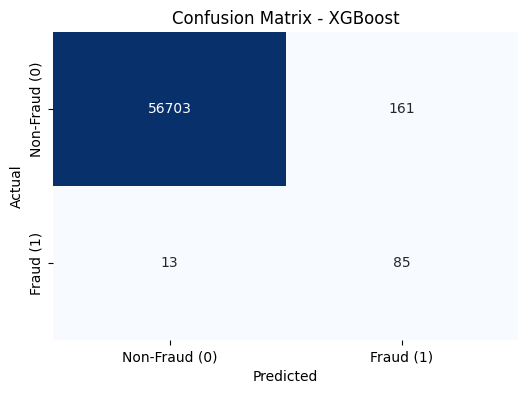

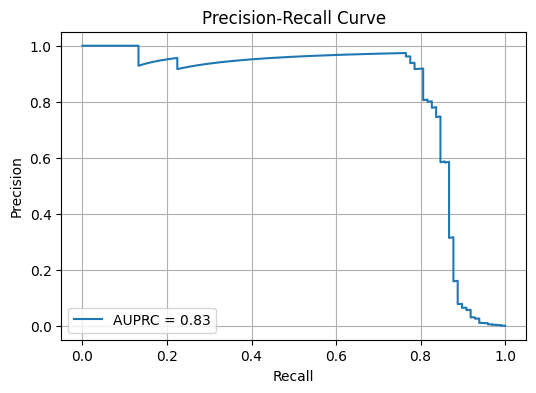


Top 5 Features by Importance:
   Feature  Importance
14     V14    0.536053
4       V4    0.049527
12     V12    0.038911
8       V8    0.033388
13     V13    0.021573


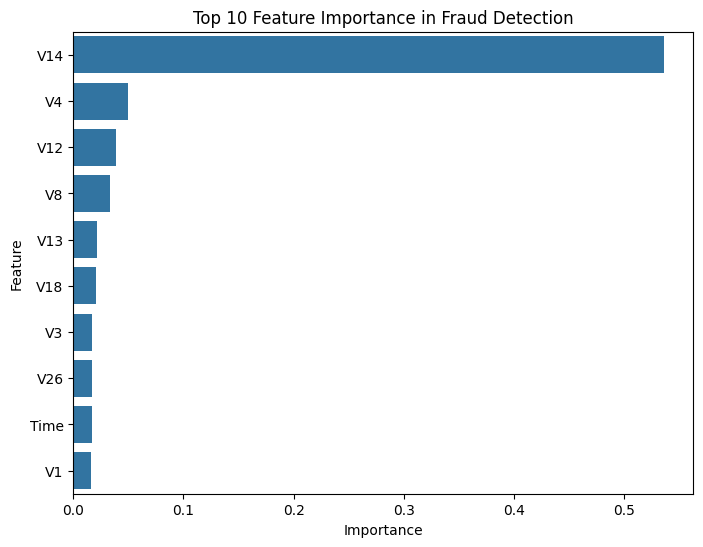

In [ ]:
# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)
print("\nArea Under Precision-Recall Curve (AUPRC):", auprc)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')  
plt.show()

# Visualize Precision-Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.savefig('precision_recall_curve.png')  
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nTop 5 Features by Importance:")
print(feature_importance.head())

# Visualize Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance in Fraud Detection')
plt.savefig('feature_importance.png')  
plt.show()